In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import euclidean
import scipy.cluster.hierarchy as shc
from scipy.stats import pearsonr
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

%matplotlib inline
sns.set(style='white')
colors = [['dimgray', 'forestgreen', 'red', 'navy', 'royalblue', 'maroon'],
          ['dimgray', 'forestgreen', 'red', 'maroon', 'royalblue', 'navy', 'purple'],
          ['forestgreen', 'red', 'royalblue']]

np.random.seed(0)

In [2]:
# Loading the data

dataset_3 = pd.read_csv('data/cluster_ds3.csv',
                  header=0,
                  index_col=None)

dataset_4 = pd.read_csv('data/cluster_ds4.csv',
                  header=0,
                  index_col=None)

dataset_5 = pd.read_csv('data/cluster_ds5.csv',
                  header=0,
                  index_col=None)

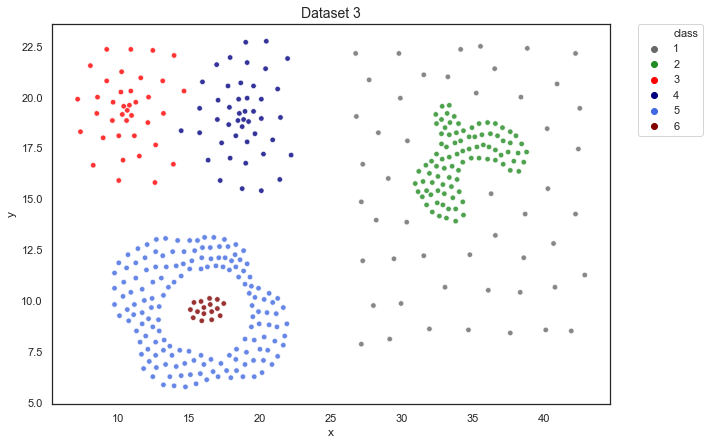

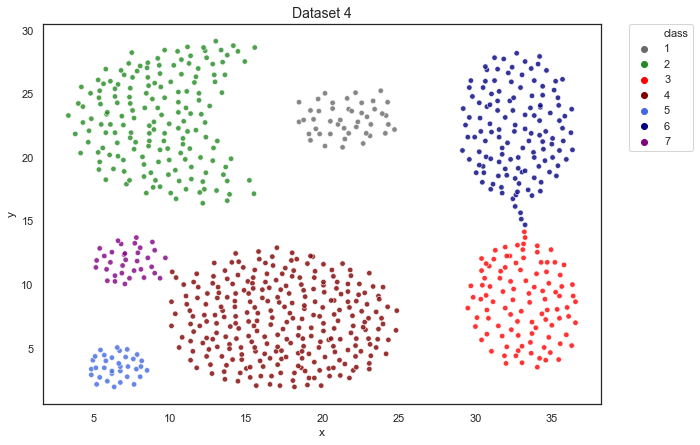

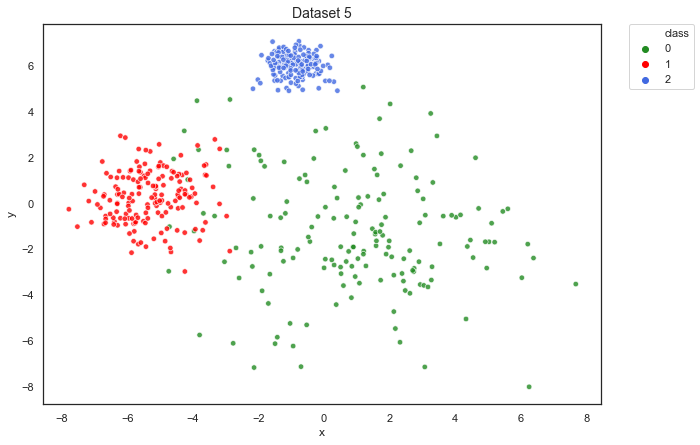

In [3]:
# Original clusters

fig = plt.figure(figsize=[10, 7])
s = sns.scatterplot(data=dataset_3,
                    x='x',
                    y='y',
                    hue='class',
                    s=30, alpha=0.8,
                    legend='full',
                    palette=colors[0])
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
t = plt.title('Dataset 3', fontsize=14)
plt.show()
plt.close()

fig = plt.figure(figsize=[10, 7])
s = sns.scatterplot(data=dataset_4,
                    x='x',
                    y='y',
                    hue='class',
                    s=30, alpha=0.8,
                    legend='full',
                    palette=colors[1])
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
t = plt.title('Dataset 4', fontsize=14)
plt.show()
plt.close()

fig = plt.figure(figsize=[10, 7])
s = sns.scatterplot(data=dataset_5,
                    x='x',
                    y='y',
                    hue='class',
                    s=30, alpha=0.8,
                    legend='full',
                    palette=colors[2])
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
t = plt.title('Dataset 5', fontsize=14)
plt.show()
plt.close()

In [4]:
# Data Analysis

print('=> Dataset 3\n')
dataset_3.info()
print('\n=> Dataset 4\n')
dataset_4.info()
print('\n=> Dataset 5\n')
dataset_5.info()

=> Dataset 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 3 columns):
x        399 non-null float64
y        399 non-null float64
class    399 non-null int64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB

=> Dataset 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 3 columns):
x        788 non-null float64
y        788 non-null float64
class    788 non-null int64
dtypes: float64(2), int64(1)
memory usage: 18.6 KB

=> Dataset 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
x        500 non-null float64
y        500 non-null float64
class    500 non-null int64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [5]:
print('\n=> Dataset 3')
dataset_3.describe()
print('\n=> Dataset 4')
dataset_4.describe()
print('\n=> Dataset 5')
dataset_5.describe()


=> Dataset 3


x           y       class
count  399.000000  399.000000  399.000000
mean    22.215038   13.970677    3.543860
std      9.736752    4.743516    1.581125
min      7.150000    5.750000    1.000000
25%     14.100000    9.775000    2.000000
50%     18.950000   14.150000    4.000000
75%     32.725000   18.125000    5.000000
max     42.900000   22.750000    6.000000


=> Dataset 4


x           y       class
count  788.000000  788.000000  788.000000
mean    19.566815   14.171764    3.770305
std      9.922042    8.089683    1.596305
min      3.350000    1.950000    1.000000
25%     11.150000    7.037500    2.000000
50%     18.225000   11.725000    4.000000
75%     30.700000   21.962500    5.000000
max     36.550000   29.150000    7.000000


=> Dataset 5


x           y       class
count  500.000000  500.000000  500.000000
mean    -1.762312    1.651048    0.998000
std      3.076568    3.566898    0.816903
min     -7.779000   -8.029000    0.000000
25%     -4.657750   -0.872750    0.000000
50%     -1.232000    0.942500    1.000000
75%     -0.174500    5.706500    2.000000
max      7.674000    7.083000    2.000000

In [6]:
# Data preprocessing

def feature_matrix(df):
    return df[['x', 'y']].to_numpy()

In [7]:
# Basic Clustering Algorithms

def cluster(df, k, title):
    kmeans = KMeans(n_clusters=k, n_init=50).fit(feature_matrix(df))
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    df['kmeans'] = labels
    
    aggcluster = AgglomerativeClustering(n_clusters=k).fit(feature_matrix(df))
    labels = aggcluster.labels_
    df['agg'] = labels
    
    # Computing hyperparameters for DBSCAN
    
    nbrs = NearestNeighbors(n_neighbors=4).fit(df)
    distances, indices = nbrs.kneighbors(df)
    sorted_ix = distances[:,3].argsort()
    px = list(range(len(distances)))
    py = distances[sorted_ix,3]
    N = len(py)
    points_along_curve = np.column_stack([px, py])
    first_point = points_along_curve[0]
    b = points_along_curve[-1] - points_along_curve[0]
    b_norm = np.linalg.norm(b)
    b_hat = b / b_norm
    a = points_along_curve - first_point
    a_1_norm = np.dot(a, b_hat)
    a_1      = np.outer(b_hat, a_1_norm).T
    a_2 = a - a_1
    best_ix = np.argmax(np.linalg.norm(a_2, axis=1))
    best_eps = py[best_ix]
    
    db = DBSCAN(eps=best_eps, min_samples=4).fit(feature_matrix(df))
    labels = db.labels_
    df['dbscan'] = labels
    mycmap = ListedColormap([
        '#000000', '#e6194b', '#3cb44b', '#ffe119', 
        '#4363d8', '#f58231', '#911eb4', '#46f0f0', 
        '#f032e6', '#bcf60c', '#fabebe', '#008080', 
        '#e6beff', '#9a6324', '#fffac8', '#800000', 
        '#aaffc3', '#808000', '#ffd8b1', '#000075', 
        '#808080'
    ], name='mhb1', N=None)
    
    # Plot clusters
    
    fig = plt.figure(figsize=[40, 6])
    
    sp1 = fig.add_subplot(141)
    sc1 = sns.scatterplot(data=df,
                          x='x',
                          y='y',
                          hue='class',
                          s=50, alpha=0.9,
                          legend='full',
                          palette=sns.color_palette(n_colors=k))
    l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    sp2 = fig.add_subplot(142)
    sc2 = sns.scatterplot(data=df,
                          x='x',
                          y='y',
                          hue='kmeans',
                          s=50, alpha=0.9,
                          legend='full',
                          palette=sns.color_palette(n_colors=k))
    l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    sp3 = fig.add_subplot(143)
    sc3 = sns.scatterplot(data=df,
                          x='x',
                          y='y',
                          hue='agg',
                          s=50, alpha=0.9,
                          legend='full',
                          palette=sns.color_palette(n_colors=k))
    l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    sp4 = fig.add_subplot(144)
    sc4 = sns.scatterplot(data=df,
                          x='x',
                          y='y',
                          hue='dbscan',
                          s=50, alpha=0.9,
                          legend='full',
                          palette=mycmap)
    l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    sp1.title.set_text('original clusters')
    sp2.title.set_text('kmeans')
    sp3.title.set_text('agglomerative')
    sp4.title.set_text('dbscan')
    
    t = plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    t.set_y(0.95)
    plt.subplots_adjust(top=0.85)
    plt.show()
    plt.close()

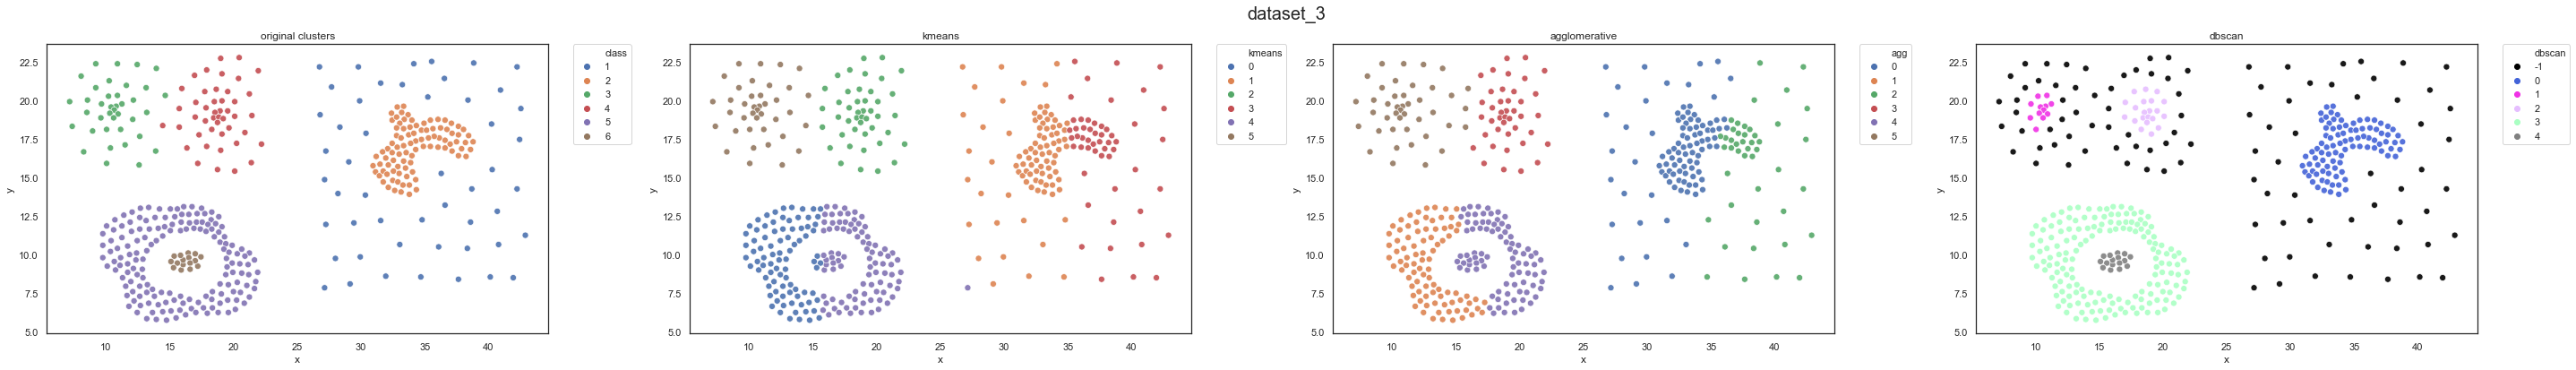

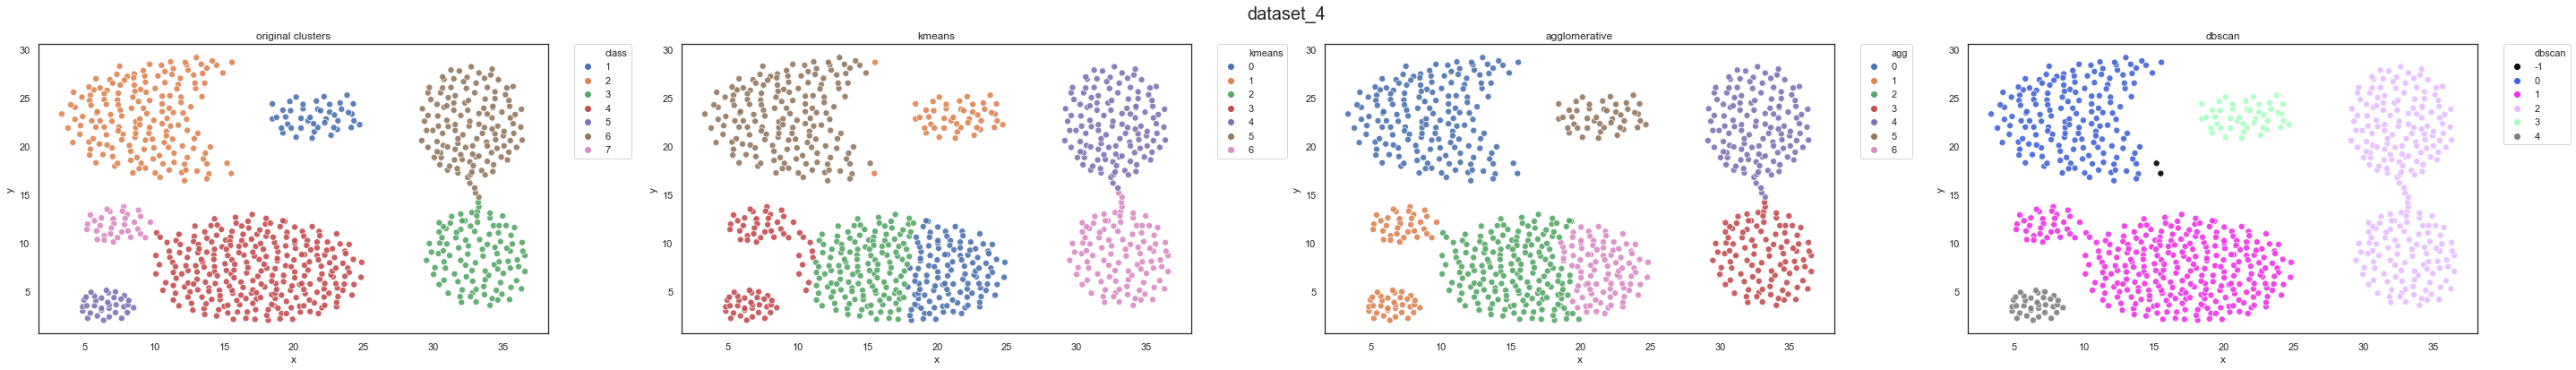

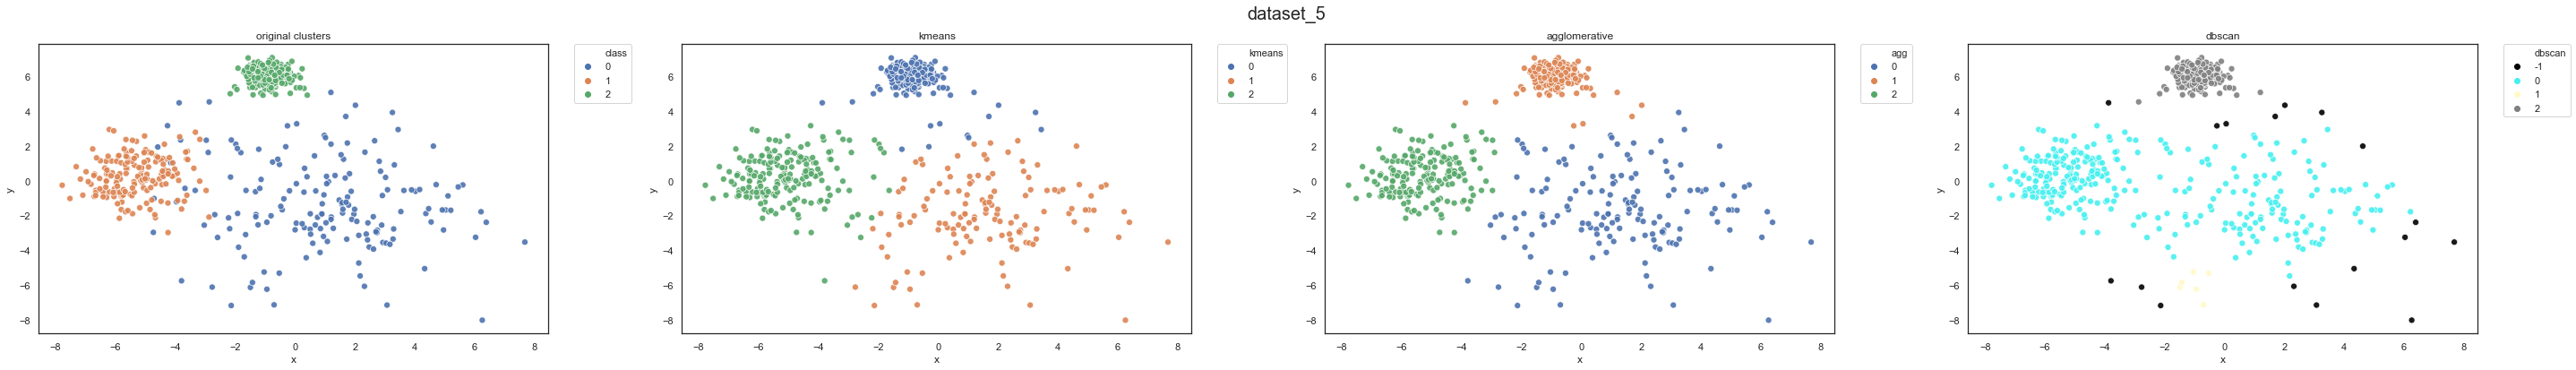

In [8]:
cluster(dataset_3, 6, 'dataset_3')
cluster(dataset_4, 7, 'dataset_4')
cluster(dataset_5, 3, 'dataset_5')

## Evaluation

In [9]:
def sil(df):
    for K in range(2,7):

        # Cluster using Kmeans
        kmeans = KMeans(init='random', n_clusters=K)
        y = kmeans.fit_predict(df)

        # Create side-by-side plots
        fig = plt.figure(figsize=(12, 4), dpi=100)
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        # ------------------------------------------
        # The left subplot is the silhouette plot
        # ------------------------------------------

        ax1.set_xlim([-0.1, 1.0])
        vertical_spacing = (K+1)*10 # extra spacing to separate the silhouettes
        ax1.set_ylim([0, len(df) + vertical_spacing])

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(df, y)
        print("For K = {}, the average silhouette score is {:.3f}".format(K, silhouette_avg))

        # Compute the silhouette scores for each instance/sample/object
        sample_silhouette_values = silhouette_samples(df, y)

        y_lower = 10
        for i in range(K):
            # Aggregate and sort the silhouette scores for samples in cluster i
            ith_cluster_silhouette_values = sample_silhouette_values[y==i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # color setup
            color = cm.nipy_spectral(float(i) / K)

            # Fill the area between two curves
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                0, ith_cluster_silhouette_values,
                facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("Silhouette Plot")
        ax1.set_xlabel("Silhouette Score")
        ax1.set_ylabel("Cluster Label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # ------------------------------------------
        # The right plot shows the actual clusters formed
        # ------------------------------------------

        colors = cm.nipy_spectral(y.astype(float) / K)
        ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

        # Mark the cluster centers
        centers = kmeans.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='+', c="black", alpha=1, s=200, edgecolor='k')

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        # Label the cluster centers
        for i, c in enumerate(centers):
            cl = '${}$'.format(i)
            ax2.scatter(c[0], c[1], marker=cl, alpha=1, s=50, c='k', edgecolor='')

        ax2.set_title("Clustered Data")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle("Silhouette analysis for KMeans clustering with K = {}".format(K),
                     fontsize=14, fontweight='bold')

        plt.show()

For K = 2, the average silhouette score is 0.616


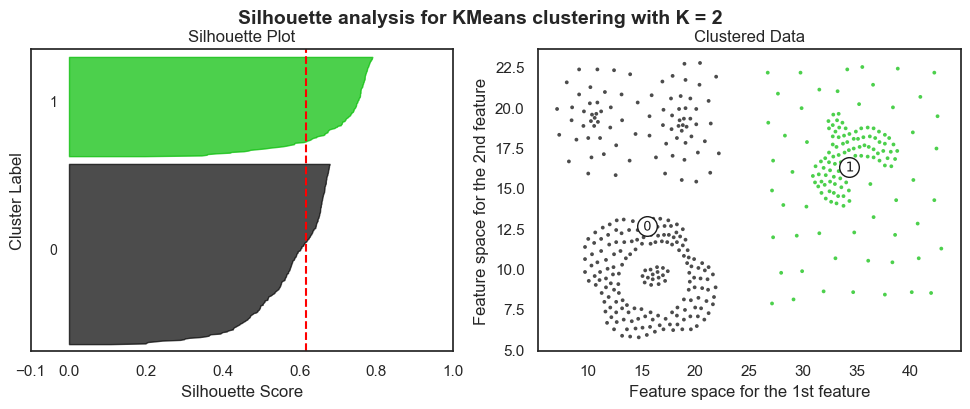

For K = 3, the average silhouette score is 0.560


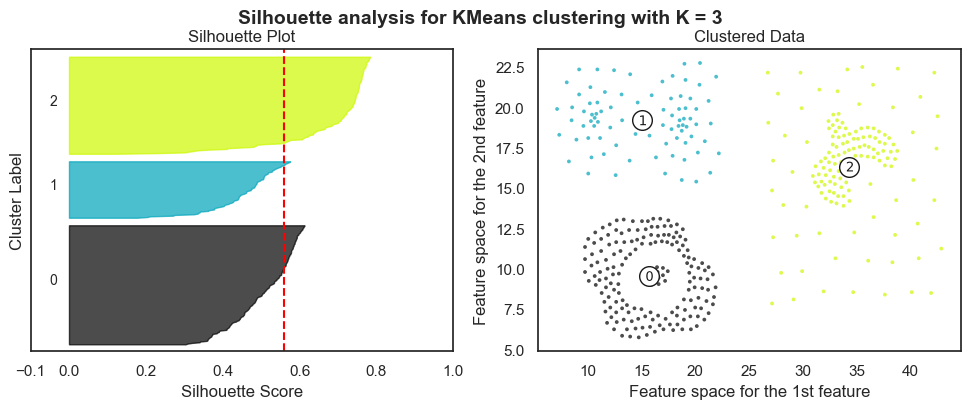

For K = 4, the average silhouette score is 0.557


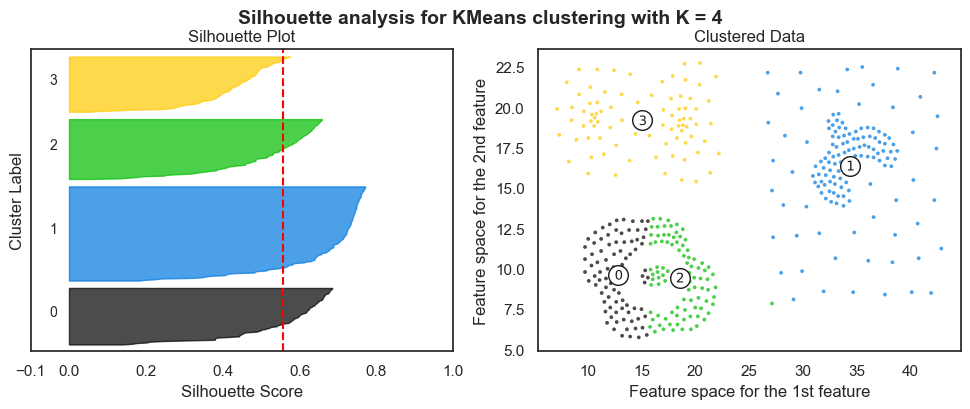

For K = 5, the average silhouette score is 0.574


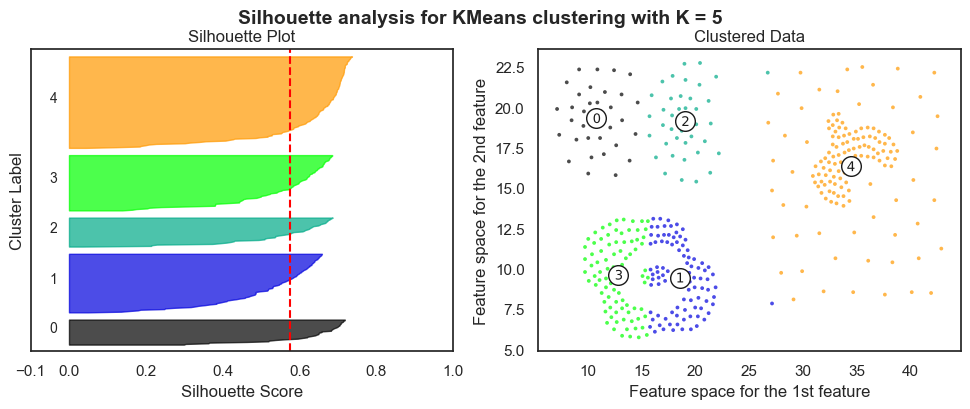

For K = 6, the average silhouette score is 0.496


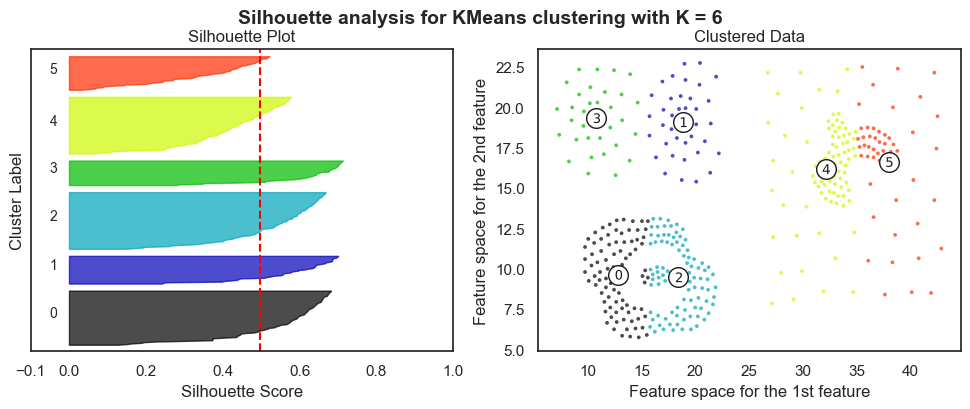

For K = 2, the average silhouette score is 0.442


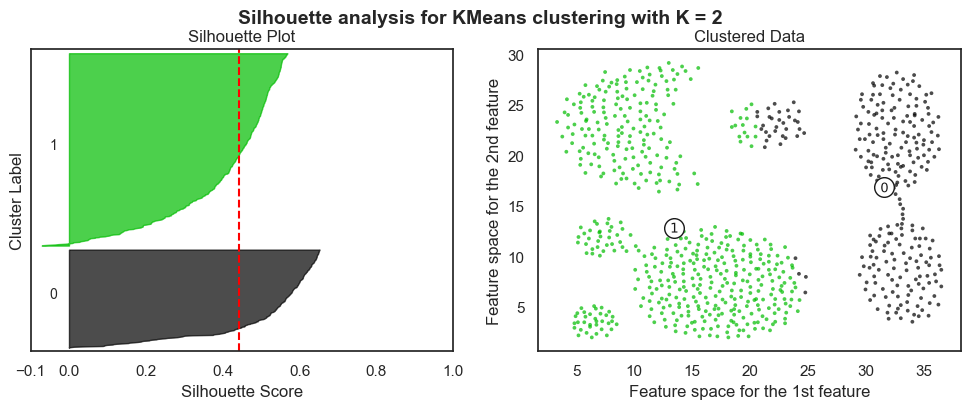

For K = 3, the average silhouette score is 0.518


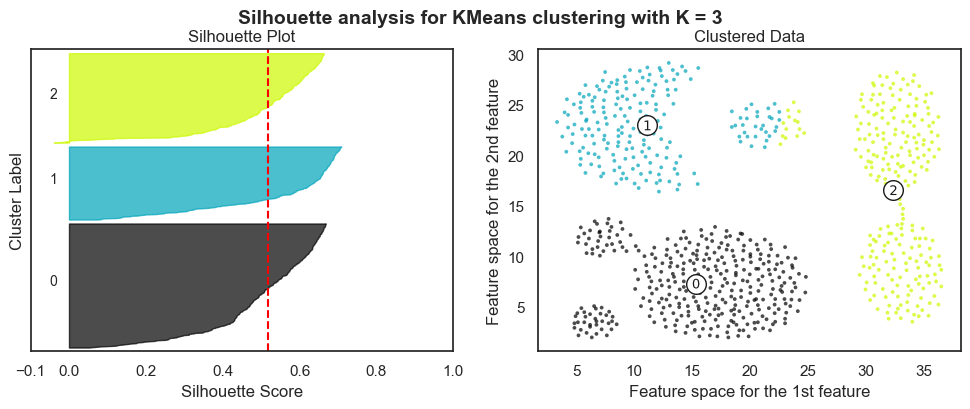

For K = 4, the average silhouette score is 0.530


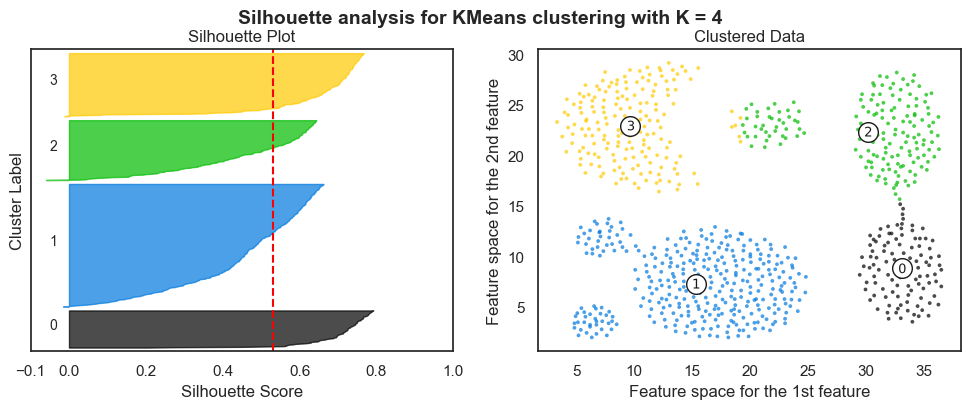

For K = 5, the average silhouette score is 0.495


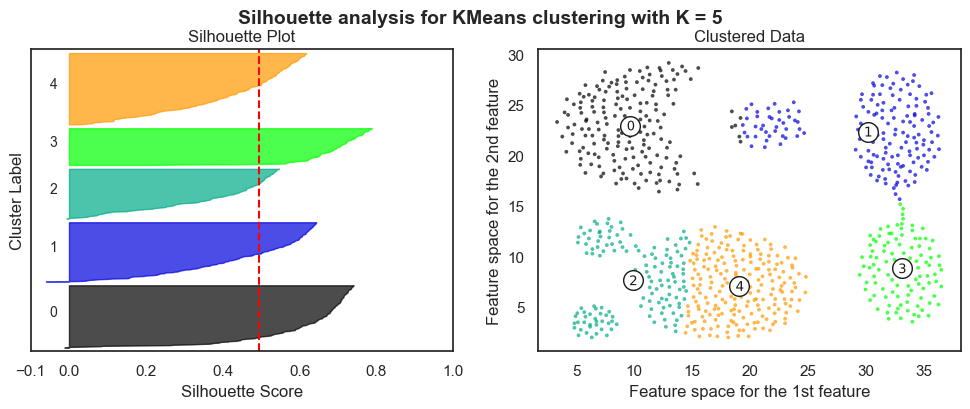

For K = 6, the average silhouette score is 0.527


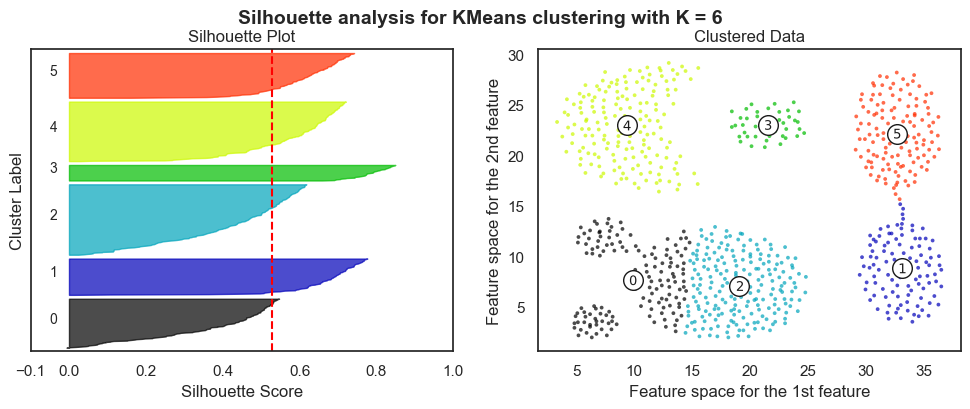

For K = 2, the average silhouette score is 0.529


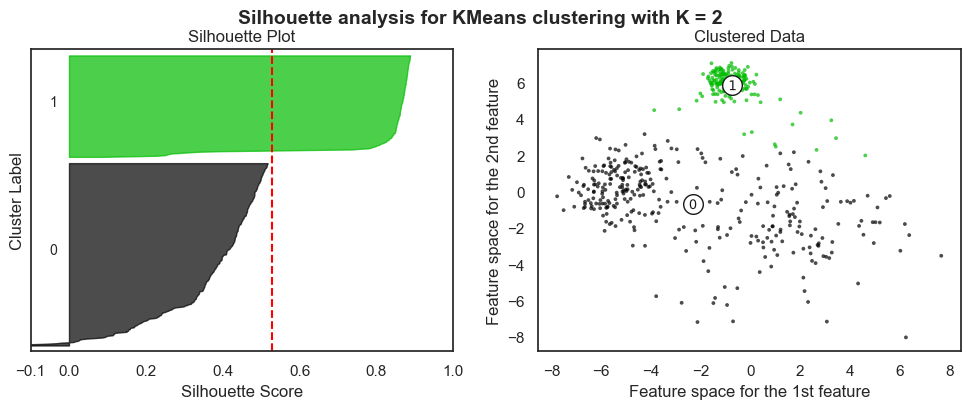

For K = 3, the average silhouette score is 0.676


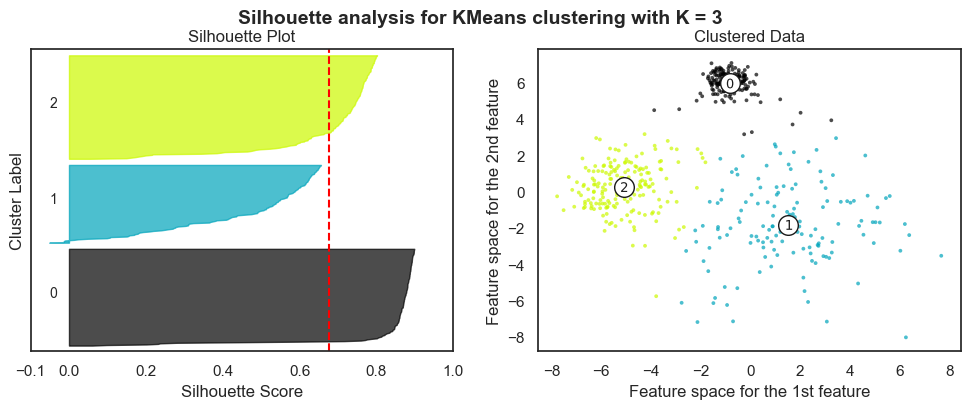

For K = 4, the average silhouette score is 0.620


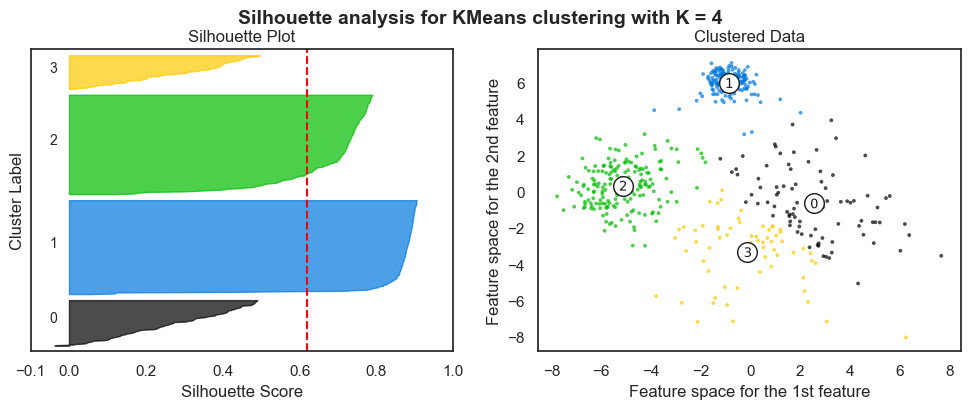

For K = 5, the average silhouette score is 0.625


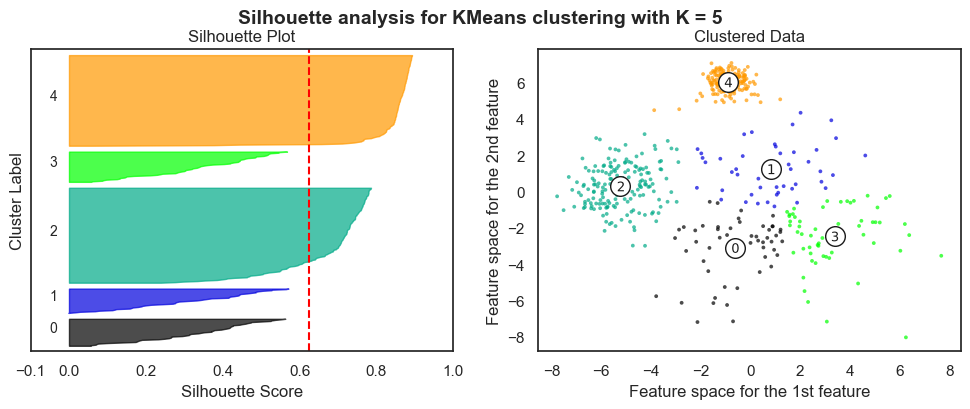

For K = 6, the average silhouette score is 0.509


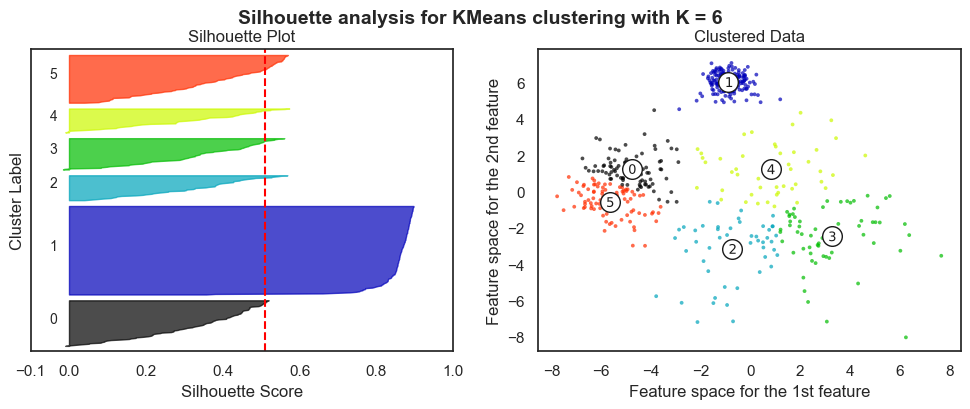

In [10]:
sil(dataset_3)
sil(dataset_4)
sil(dataset_5)

In [11]:
def sil_agg(df):
    for K in range(2,7):

        # Cluster using agg
        X=feature_matrix(df)
        aggcluster = AgglomerativeClustering(n_clusters=K)
        
        y = aggcluster.fit_predict(X)
        #labels = aggcluster.labels_
        #df['agg'] = labels

        # Create side-by-side plots
        fig = plt.figure(figsize=(12, 4), dpi=100)
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        # ------------------------------------------
        # The left subplot is the silhouette plot
        # ------------------------------------------

        ax1.set_xlim([-0.1, 1.0])
        vertical_spacing = (K+1)*10 # extra spacing to separate the silhouettes
        ax1.set_ylim([0, len(X) + vertical_spacing])

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(X, y)
        print("For K = {}, the average silhouette score is {:.3f}".format(K, silhouette_avg))

        # Compute the silhouette scores for each instance/sample/object
        sample_silhouette_values = silhouette_samples(X, y)

        y_lower = 10
        for i in range(K):
            # Aggregate and sort the silhouette scores for samples in cluster i
            ith_cluster_silhouette_values = sample_silhouette_values[y==i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # color setup
            color = cm.nipy_spectral(float(i) / K)

            # Fill the area between two curves
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                0, ith_cluster_silhouette_values,
                facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("Silhouette Plot")
        ax1.set_xlabel("Silhouette Score")
        ax1.set_ylabel("Cluster Label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # ------------------------------------------
        # The right plot shows the actual clusters formed
        # ------------------------------------------

        colors = cm.nipy_spectral(y.astype(float) / K)
        ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

        # Mark the cluster centers
        #centers = aggcluster.cluster_centers_
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='+', c="black", alpha=1, s=200, edgecolor='k')

        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        # Label the cluster centers
        #for i, c in enumerate(centers):
        #    cl = '${}$'.format(i)
        #    ax2.scatter(c[0], c[1], marker=cl, alpha=1, s=50, c='k', edgecolor='')

        ax2.set_title("Clustered Data")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle("Silhouette analysis for Agglomerative clustering with n_clusters = {}".format(K),
                     fontsize=14, fontweight='bold')

        plt.show()

For K = 2, the average silhouette score is 0.638


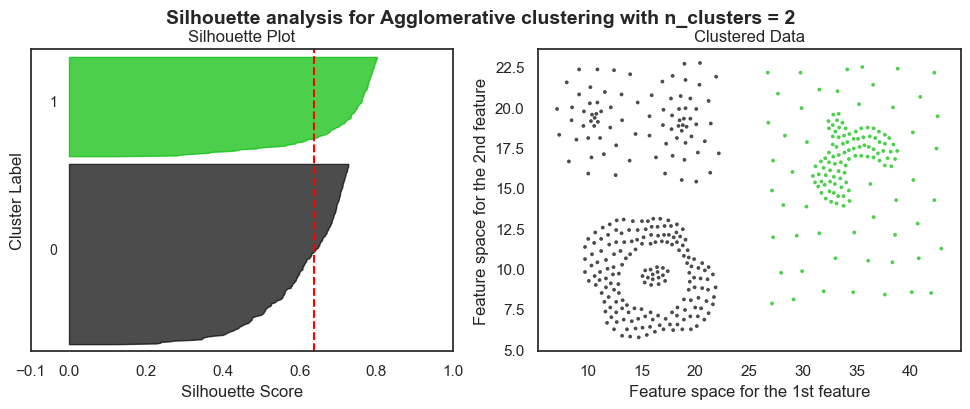

For K = 3, the average silhouette score is 0.576


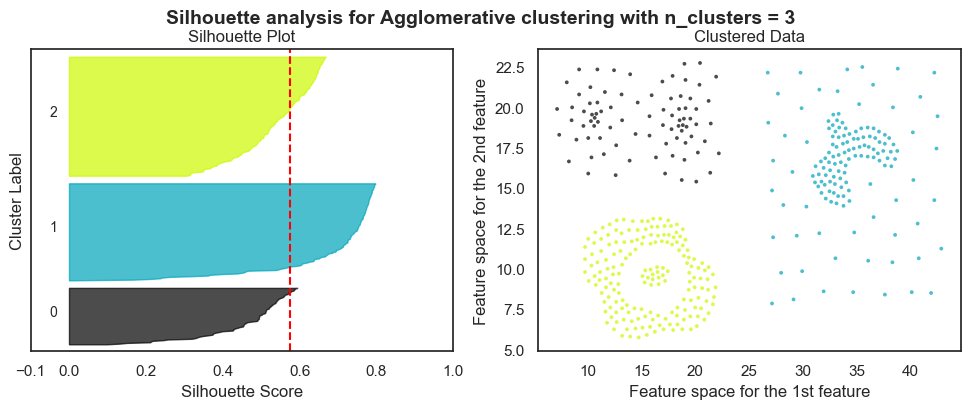

For K = 4, the average silhouette score is 0.550


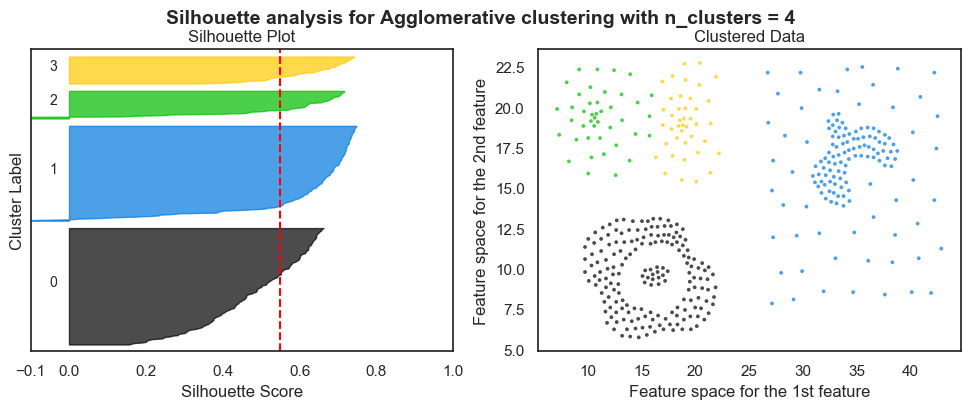

For K = 5, the average silhouette score is 0.510


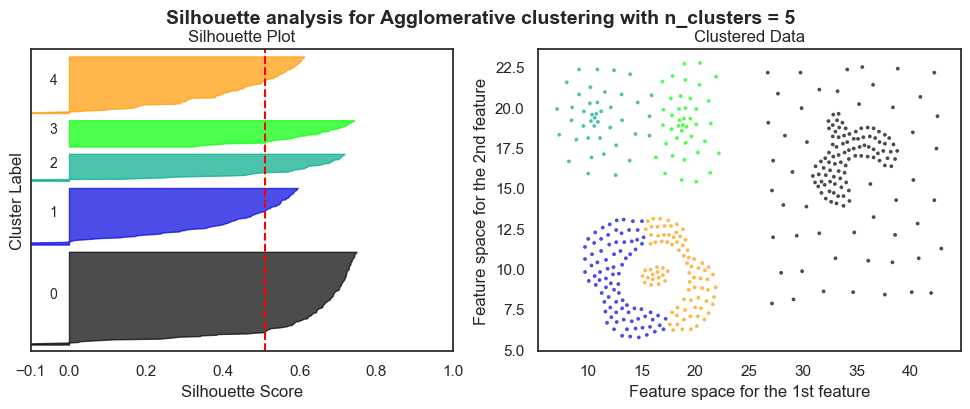

For K = 6, the average silhouette score is 0.418


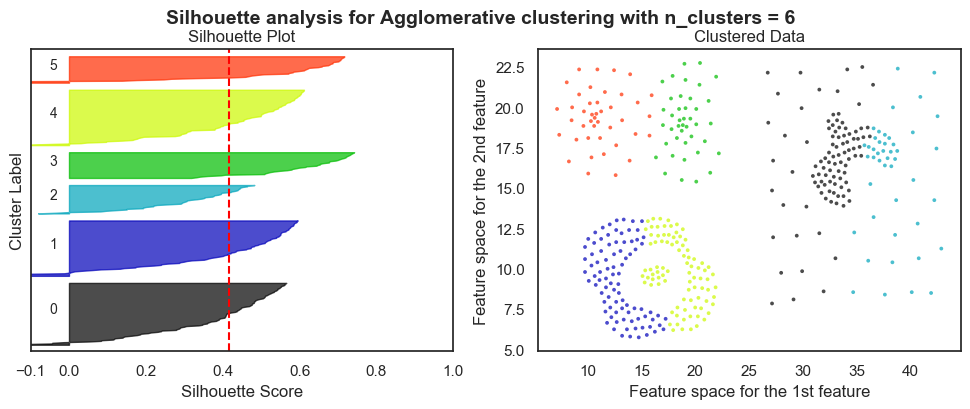

For K = 2, the average silhouette score is 0.453


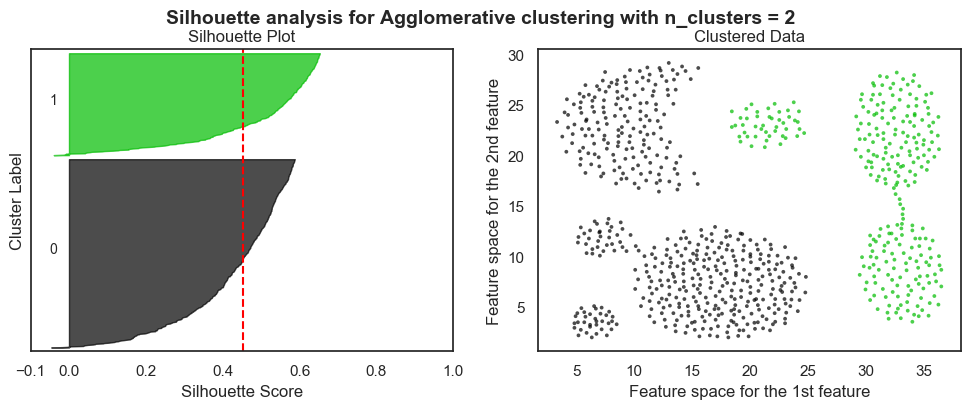

For K = 3, the average silhouette score is 0.512


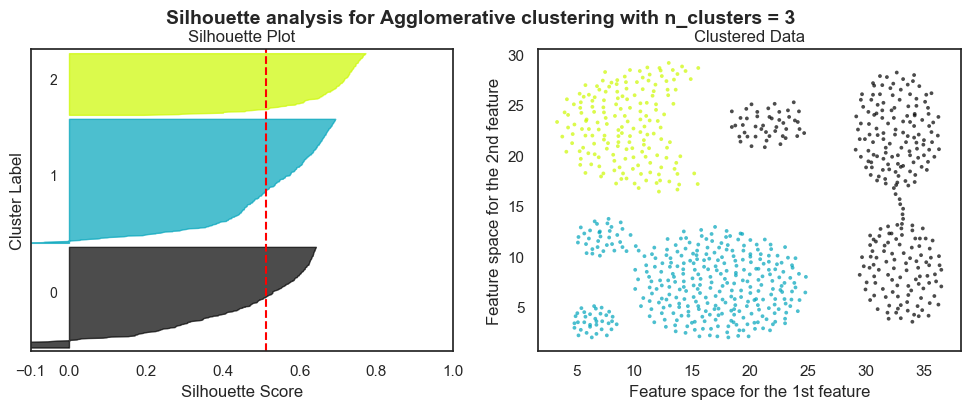

For K = 4, the average silhouette score is 0.522


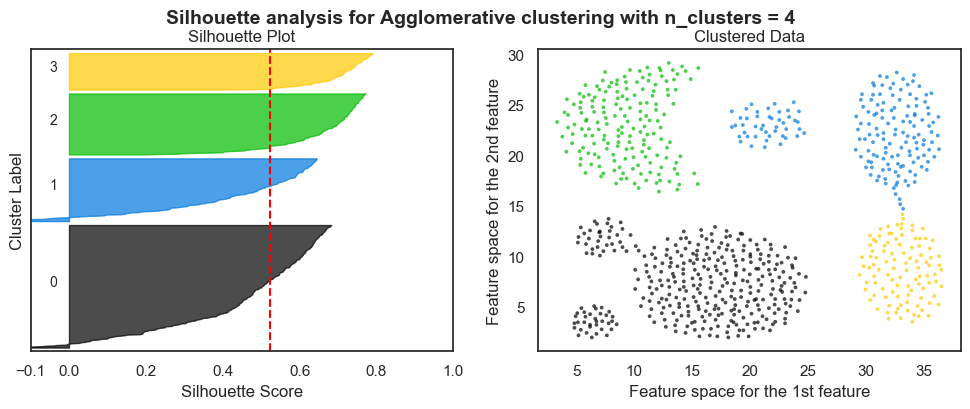

For K = 5, the average silhouette score is 0.501


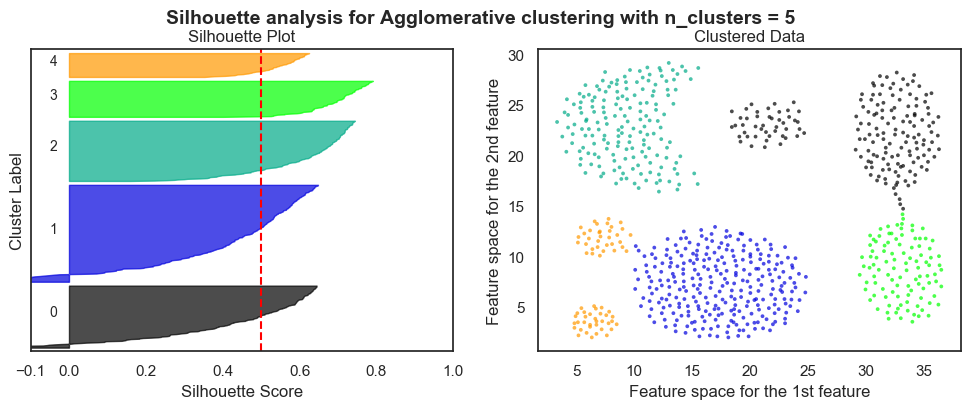

For K = 6, the average silhouette score is 0.512


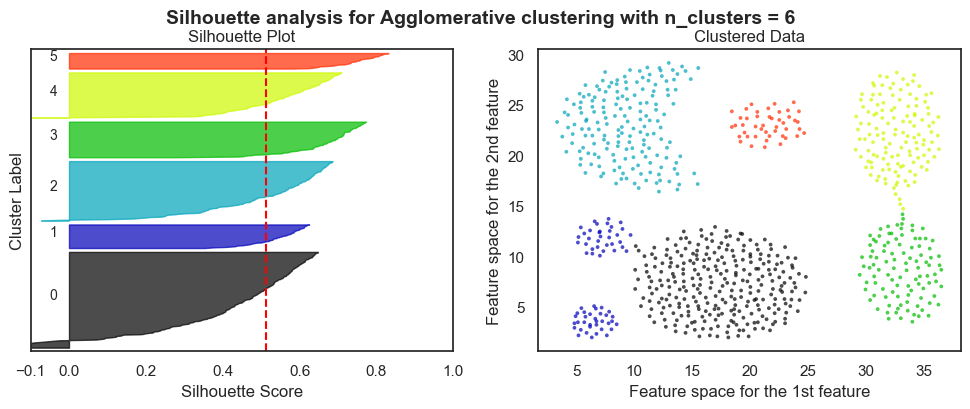

For K = 2, the average silhouette score is 0.510


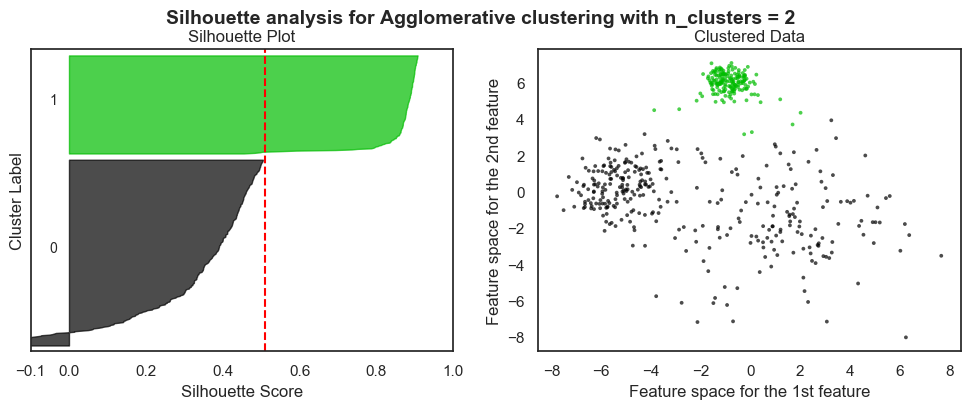

For K = 3, the average silhouette score is 0.651


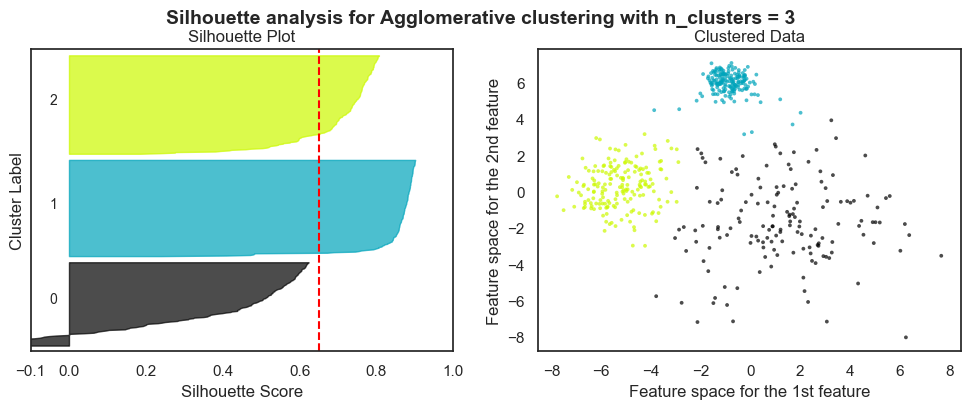

For K = 4, the average silhouette score is 0.592


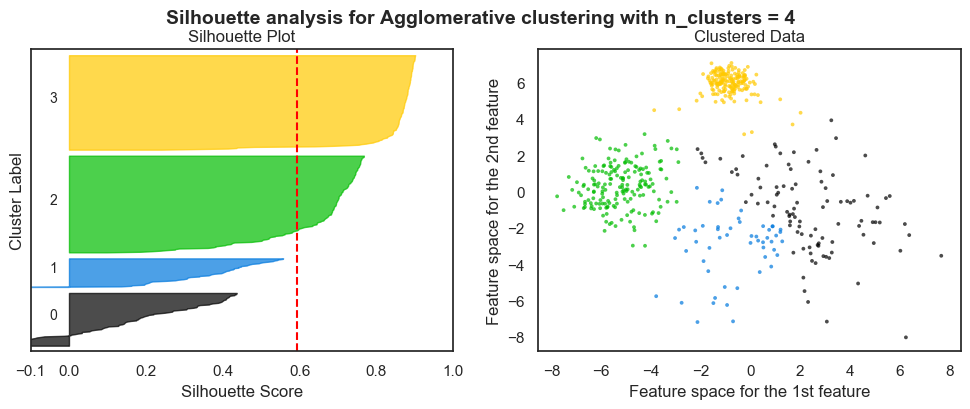

For K = 5, the average silhouette score is 0.602


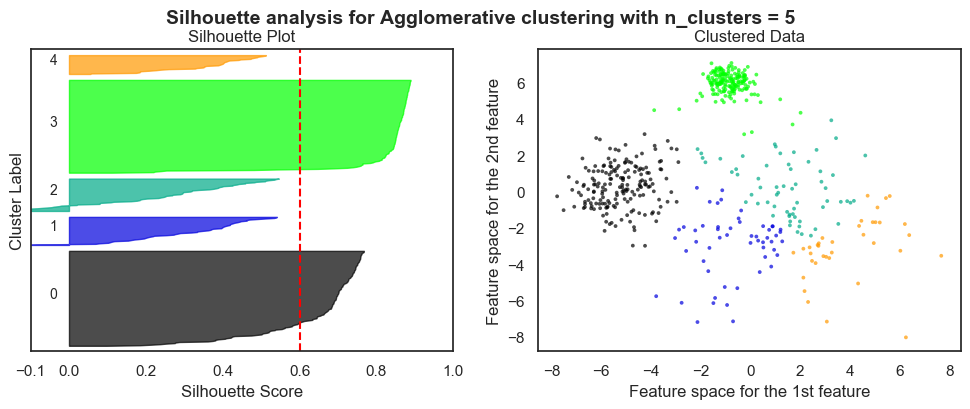

For K = 6, the average silhouette score is 0.485


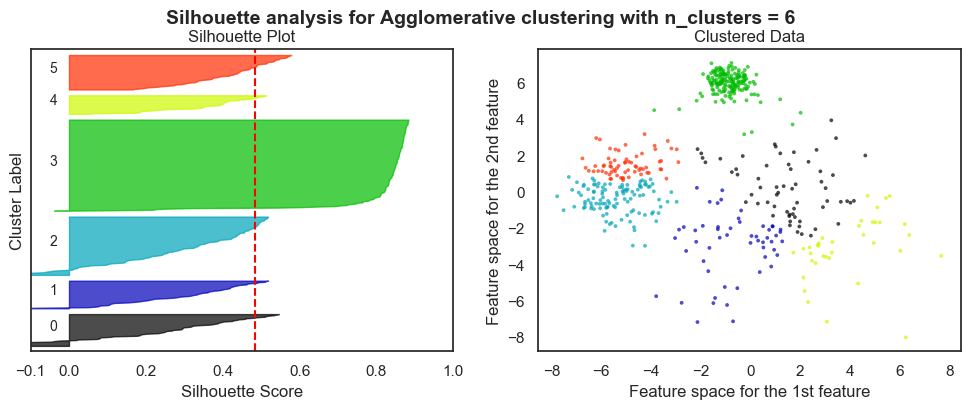

In [12]:
sil_agg(dataset_3)
sil_agg(dataset_4)
sil_agg(dataset_5)

In [13]:
def den(df):
    X=feature_matrix(df)

    import scipy.cluster.hierarchy as shc

    #plt.figure(figsize=(50, 100))
    fig = plt.figure(figsize=(60, 100), dpi=100)
    ax1 = fig.add_subplot(1, 1, 1)
    dend = shc.dendrogram(shc.linkage(X, method='ward'))
    #ax1.set_title("Dendograms depicting the order of agglomerative clustering")
    ax1.set_xlabel("Feature space for the 1st feature")
    ax1.set_ylabel("Feature space for the 2nd feature", fontsize=100, fontweight='bold')

    plt.suptitle("Dendogram for the cluster.",
                 fontsize=100, fontweight='bold')

    plt.show()

In [14]:
# den(dataset_3)
# den(dataset_4)
# den(dataset_5)

In [15]:
# Mapping cluster labels to true labels for kmeans

def kmeans_3(x):
    if x == 0:
        return 5
    if x == 1:
        return 2
    if x == 2:
        return 4
    if x == 3:
        return 1
    if x == 4:
        return 6
    if x == 5:
        return 3

dataset_3['kmeans_'] = dataset_3['kmeans'].apply(lambda x: kmeans_3(x))
a = accuracy_score(dataset_3['class'].to_numpy(), dataset_3['kmeans_'].to_numpy())
print('Accuracy of KMeans clustering on dataset 3:\n', a)

def kmeans_4(x):
    if x == 0:
        return 6
    if x == 1:
        return 1
    if x == 2:
        return 4
    if x == 3:
        return 7
    if x == 4:
        return 6
    if x == 5:
        return 2
    if x == 6:
        return 3

dataset_4['kmeans_'] = dataset_4['kmeans'].apply(lambda x: kmeans_4(x))
a = accuracy_score(dataset_4['class'].to_numpy(), dataset_4['kmeans_'].to_numpy())
print('Accuracy of KMeans clustering on dataset 4:\n', a)

def kmeans_5(x):
    if x == 0:
        return 2
    if x == 1:
        return 0
    if x == 2:
        return 1

dataset_5['kmeans_'] = dataset_5['kmeans'].apply(lambda x: kmeans_5(x))
a = accuracy_score(dataset_5['class'].to_numpy(), dataset_5['kmeans_'].to_numpy())
print('Accuracy of KMeans clustering on dataset 5:\n', a)

Accuracy of KMeans clustering on dataset 3:
 0.656641604010025
Accuracy of KMeans clustering on dataset 4:
 0.7855329949238579
Accuracy of KMeans clustering on dataset 5:
 0.93


In [16]:
# Mapping cluster labels to true labels for agglomerative clustering

def agg_3(x):
    if x == 0:
        return 2
    if x == 1:
        return 5
    if x == 2:
        return 1
    if x == 3:
        return 4
    if x == 4:
        return 6
    if x == 5:
        return 3

dataset_3['agg_'] = dataset_3['agg'].apply(lambda x: agg_3(x))
a = accuracy_score(dataset_3['class'].to_numpy(), dataset_3['agg_'].to_numpy())
print('Accuracy of agglomerative clustering on dataset 3:\n', a)

def agg_4(x):
    if x == 0:
        return 2
    if x == 1:
        return 7
    if x == 2:
        return 4
    if x == 3:
        return 3
    if x == 4:
        return 6
    if x == 5:
        return 1
    if x == 6:
        return 5

dataset_4['agg_'] = dataset_4['agg'].apply(lambda x: agg_4(x))
a = accuracy_score(dataset_4['class'].to_numpy(), dataset_4['agg_'].to_numpy())
print('Accuracy of agglomerative clustering on dataset 4:\n', a)

def agg_5(x):
    if x == 0:
        return 0
    if x == 1:
        return 2
    if x == 2:
        return 1

dataset_5['agg_'] = dataset_5['agg'].apply(lambda x: agg_5(x))
a = accuracy_score(dataset_5['class'].to_numpy(), dataset_5['agg_'].to_numpy())
print('Accuracy of agglomerative clustering on dataset 5:\n', a)

Accuracy of agglomerative clustering on dataset 3:
 0.6892230576441103
Accuracy of agglomerative clustering on dataset 4:
 0.8375634517766497
Accuracy of agglomerative clustering on dataset 5:
 0.962


In [17]:
# Mapping cluster labels to true labels for DBSCAN

def db_3(x):
    if x == -1:
        return x
    if x == 0:
        return 2
    if x == 1:
        return 3
    if x == 2:
        return 4
    if x == 3:
        return 5
    if x == 4:
        return 6

dataset_3['dbscan_'] = dataset_3['dbscan'].apply(lambda x: db_3(x))
a = accuracy_score(dataset_3['class'].to_numpy(), dataset_3['dbscan_'].to_numpy())
print('Accuracy of DBSCAN on dataset 3:\n', a)

def db_4(x):
    if x == -1:
        return x
    if x == 0:
        return 2
    if x == 1:
        return 4
    if x == 2:
        return 6
    if x == 3:
        return 1
    if x == 4:
        return 5

dataset_4['dbscan_'] = dataset_4['dbscan'].apply(lambda x: db_4(x))
a = accuracy_score(dataset_4['class'].to_numpy(), dataset_4['dbscan_'].to_numpy())
print('Accuracy of DBSCAN on dataset 4:\n', a)

def db_5(x):
    if x == -1:
        return x
    if x == 0:
        return 1
    if x == 1:
        return 0
    if x == 2:
        return 2

dataset_5['dbscan_'] = dataset_5['dbscan'].apply(lambda x: db_5(x))
a = accuracy_score(dataset_5['class'].to_numpy(), dataset_5['dbscan_'].to_numpy())
print('Accuracy of DBSCAN on dataset 5:\n', a)

Accuracy of DBSCAN on dataset 3:
 0.7493734335839599
Accuracy of DBSCAN on dataset 4:
 0.8248730964467005
Accuracy of DBSCAN on dataset 5:
 0.678


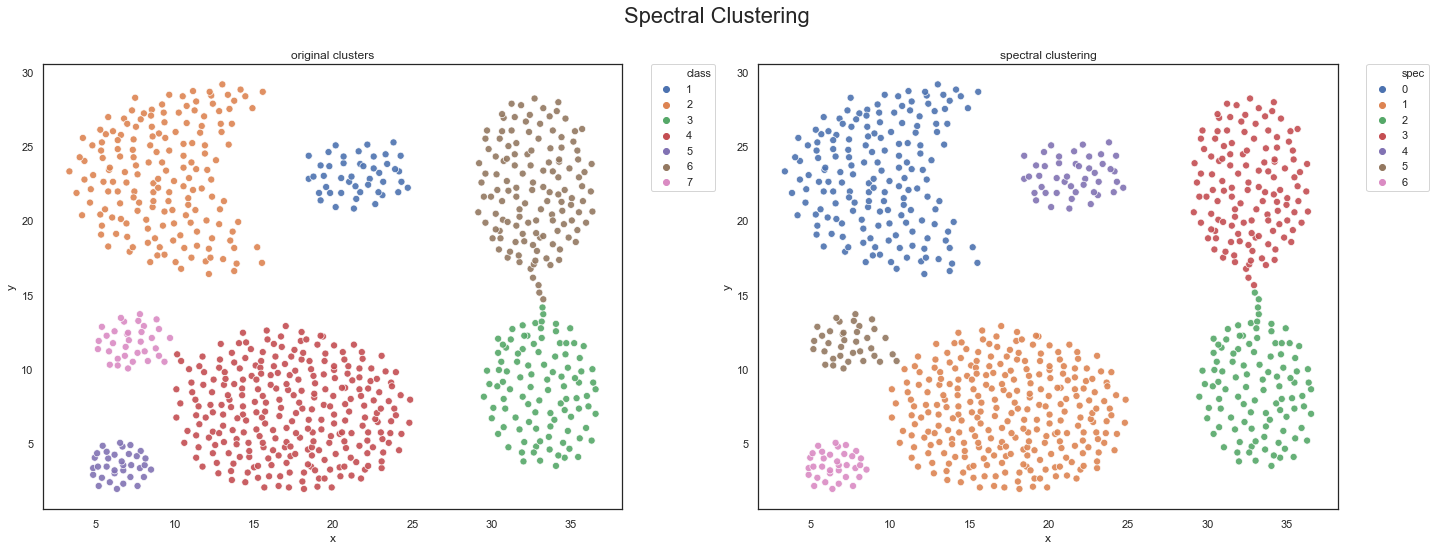

In [18]:
# Improving using Spectral Clustering

from sklearn.cluster import SpectralClustering

dataset_4['spec'] = SpectralClustering(n_clusters=7).fit(feature_matrix(dataset_4)).labels_

fig = plt.figure(figsize=[20, 8])

sp1 = fig.add_subplot(121)
sc1 = sns.scatterplot(data=dataset_4,
                      x='x',
                      y='y',
                      hue='class',
                      s=50, alpha=0.9,
                      legend='full',
                      palette=sns.color_palette(n_colors=7))
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sp2 = fig.add_subplot(122)
sc2 = sns.scatterplot(data=dataset_4,
                      x='x',
                      y='y',
                      hue='spec',
                      s=50, alpha=0.9,
                      legend='full',
                      palette=sns.color_palette(n_colors=7))
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sp1.title.set_text('original clusters')
sp2.title.set_text('spectral clustering')

t = fig.suptitle('Spectral Clustering', fontsize=22)
fig.tight_layout()
t.set_y(0.95)
plt.subplots_adjust(top=0.85)
plt.show()
plt.close()

In [19]:
# Mapping cluster labels to true labels for spectral clustering to measure accuracy improvement on dataset 4

def spec_4(x):
    if x == 0:
        return 2
    if x == 1:
        return 4
    if x == 2:
        return 3
    if x == 3:
        return 6
    if x == 4:
        return 1
    if x == 5:
        return 7
    if x == 6:
        return 5

dataset_4['spec_'] = dataset_4['spec'].apply(lambda x: spec_4(x))
a = accuracy_score(dataset_4['class'].to_numpy(), dataset_4['spec_'].to_numpy())
print('Accuracy of spectral clustering on dataset 4:\n', a)

Accuracy of spectral clustering on dataset 4:
 0.9949238578680203
